In [31]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Comparison Training

In [32]:
for model in os.listdir('../00_data/SBERT_Models/Evaluation/'):
  if "TSDAE" in model:
    print(f"Available model: {model}")

Available model: gbert_batch16_woTSDAE_2e-05_f10
Available model: gbert_batch16_wTSDAE_2e-05_f10
Available model: gbert_batch32_woTSDAE_2e-05_f10
Available model: gbert_batch32_wTSDAE_2e-05_f10
Available model: gbert_batch64_woTSDAE_2e-05_f10
Available model: gbert_batch64_wTSDAE_2e-05_f10
Available model: gbert_TSDAE_epochs5
Available model: jobgbert_batch16_woTSDAE_2e-05_f10
Available model: jobgbert_batch16_wTSDAE_2e-05_f10
Available model: jobgbert_batch32_woTSDAE_2e-05_f10
Available model: jobgbert_batch32_wTSDAE_2e-05_f10
Available model: jobgbert_batch64_woTSDAE_2e-05_f10
Available model: jobgbert_batch64_wTSDAE_2e-05_f10
Available model: jobgbert_TSDAE_epochs5


In [33]:
models = ["jobgbert_batch16_woTSDAE_2e-05_f10",
          "jobgbert_batch16_wTSDAE_2e-05_f10",
          "jobgbert_batch32_woTSDAE_2e-05_f10",
          "jobgbert_batch32_wTSDAE_2e-05_f10",
          "jobgbert_batch64_woTSDAE_2e-05_f10",
          "jobgbert_batch64_wTSDAE_2e-05_f10",
          "gbert_batch16_woTSDAE_2e-05_f10",
          "gbert_batch16_wTSDAE_2e-05_f10",
          "gbert_batch32_woTSDAE_2e-05_f10",
          "gbert_batch32_wTSDAE_2e-05_f10",
          "gbert_batch64_woTSDAE_2e-05_f10",
          "gbert_batch64_wTSDAE_2e-05_f10",
          ]

In [34]:
results = {}
for model_path in models:
    for item in os.listdir(f"../00_data/SBERT_Models/Evaluation/{model_path}/eval"):
        if "trainig_details" in item:
            results[model_path] = pd.read_excel(f"../00_data/SBERT_Models/Evaluation/{model_path}/eval/{item}", index_col=0)

In [35]:
# results = {"gbert": [], "jobgbert": []}
# for model_path in models:
#     for item in os.listdir(f"content/{model_path}/eval"):
#         if "trainig_details" in item and "job" in model_path:
#             results["jobgbert"].append(pd.read_excel(f"content/{model_path}/eval/{item}", index_col=0))
#         elif "trainig_details" in item:
#             results["gbert"].append(pd.read_excel(f"content/{model_path}/eval/{item}", index_col=0))
#         else:
#             continue

In [36]:
concat_df = pd.concat(results.values()).groupby(["epoch","model"]).max().reset_index()
concat_df["modelname"] = concat_df["model"].apply(lambda x: "_".join(x.split("_")[:3]))
concat_df
concat_df["pretraining"] = concat_df["model"].apply(lambda x: x.split("_")[2])
concat_df["batchsize"] = concat_df["model"].apply(lambda x: int(x.split("_")[1].replace("batch","")))
concat_df["basemodel"] = concat_df["model"].apply(lambda x: x.split("_")[0])
concat_df["epoch"] = concat_df["epoch"].apply(lambda x: x+1)
concat_df["basemodel"] = concat_df["basemodel"].replace("jobgbert","JobGBERT")
concat_df["basemodel"] = concat_df["basemodel"].replace("gbert","GBERT")
concat_df.rename({"basemodel":"base model"},inplace=True, axis=1)

<Axes: xlabel='MRR@100'>

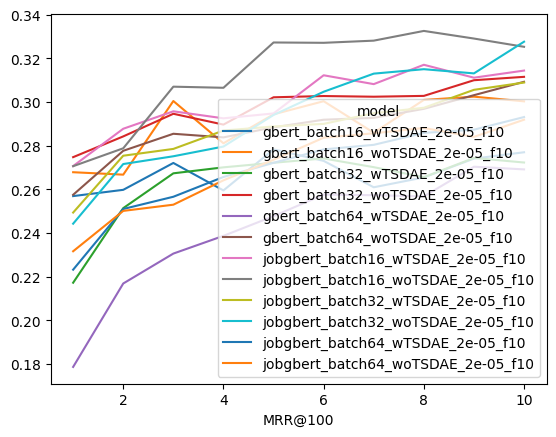

In [37]:
concat_df.pivot(index="epoch",values="MRR",columns="model").plot(xlabel="MRR@100")

In [38]:
concat_df.pivot(index="epoch",values="MRR",columns="model")

model,gbert_batch16_wTSDAE_2e-05_f10,gbert_batch16_woTSDAE_2e-05_f10,gbert_batch32_wTSDAE_2e-05_f10,gbert_batch32_woTSDAE_2e-05_f10,gbert_batch64_wTSDAE_2e-05_f10,gbert_batch64_woTSDAE_2e-05_f10,jobgbert_batch16_wTSDAE_2e-05_f10,jobgbert_batch16_woTSDAE_2e-05_f10,jobgbert_batch32_wTSDAE_2e-05_f10,jobgbert_batch32_woTSDAE_2e-05_f10,jobgbert_batch64_wTSDAE_2e-05_f10,jobgbert_batch64_woTSDAE_2e-05_f10
epoch,,,,,,,,,,,,
1,0.256903,0.267842,0.217227,0.274742,0.178655,0.257503,0.270658,0.270599,0.249365,0.244269,0.223202,0.231636
2,0.259775,0.266726,0.251385,0.284246,0.216872,0.277657,0.287751,0.278803,0.275399,0.271588,0.250998,0.250124
3,0.272082,0.300450,0.267335,0.294614,0.230571,0.285453,0.295743,0.307026,0.278513,0.275146,0.256601,0.252966
4,0.259497,0.281097,0.270075,0.289650,0.238688,0.283798,0.292528,0.306518,0.286923,0.279602,0.265660,0.264124
5,0.278284,0.294355,0.272174,0.302163,0.247715,0.288403,0.294765,0.327270,0.288801,0.294066,0.272145,0.273544
6,0.273035,0.300364,0.274142,0.302738,0.257592,0.291893,0.312247,0.327117,0.289989,0.304700,0.278288,0.283652
7,0.260942,0.285941,0.270156,0.302426,0.257312,0.292745,0.308194,0.328110,0.294870,0.312998,0.280386,0.285674
8,0.265468,0.300954,0.265565,0.302806,0.256774,0.296872,0.317054,0.332564,0.297365,0.315032,0.285850,0.288122
9,0.274077,0.302453,0.274365,0.309980,0.270355,0.303132,0.311141,0.329071,0.305581,0.313113,0.287327,0.284031


C:\Users\lw\AppData\Local\Temp\ipykernel_10044\48443685.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ax = concat_df.groupby(["base model","batchsize"]).max().round(3).reset_index().pivot("base model", "batchsize",values="MRR").plot(kind="bar",title="Comparison of Model Results with Batch Size",ylabel="MRR@100")


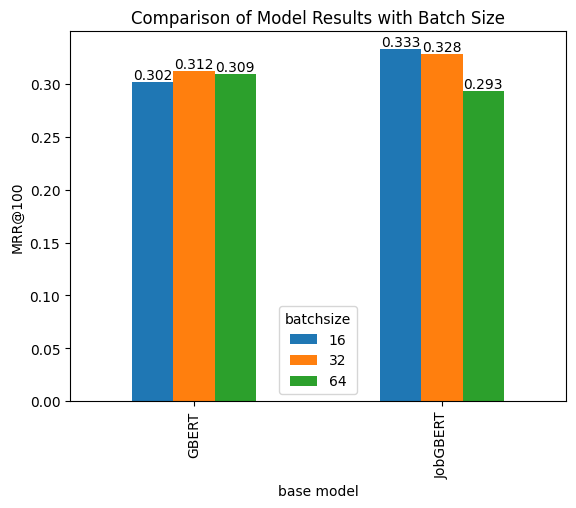

In [39]:
ax = concat_df.groupby(["base model","batchsize"]).max().round(3).reset_index().pivot("base model", "batchsize",values="MRR").plot(kind="bar",title="Comparison of Model Results with Batch Size",ylabel="MRR@100")
for container in ax.containers:
    ax.bar_label(container)

<Axes: title={'center': 'JobGBERT'}, xlabel='epoch', ylabel='MRR@100'>

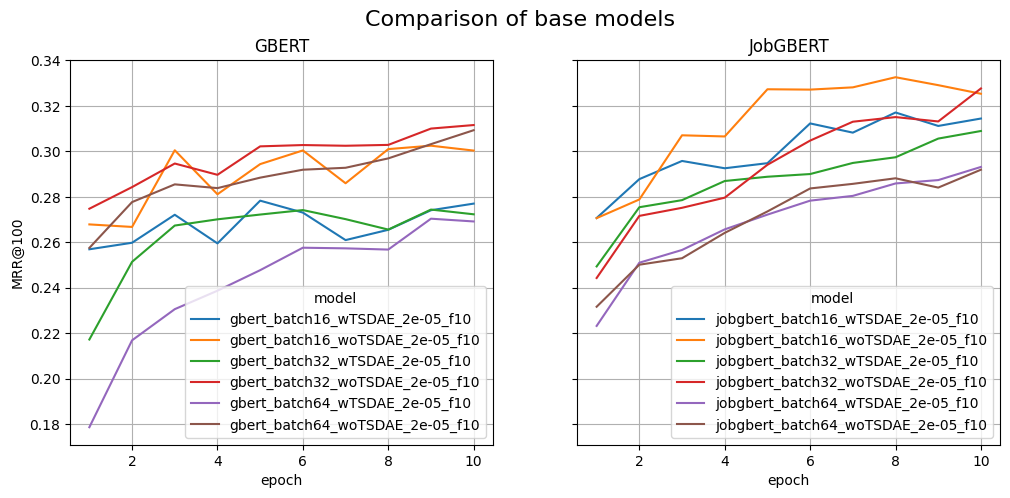

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 5))
fig.suptitle('Comparison of base models', fontsize=16)

concat_df[concat_df["base model"]=="GBERT"].reset_index(drop=True).pivot(index="epoch",values="MRR",columns="model").plot(ylabel="MRR@100",ax =axes[0], title="GBERT",grid=True)
concat_df[concat_df["base model"]=="JobGBERT"].reset_index(drop=True).pivot(index="epoch",values="MRR",columns="model").plot(ylabel="MRR@100",ax =axes[1], title="JobGBERT",grid=True)

In [41]:
concat_df[concat_df["model"]=="jobgbert_batch32_woTSDAE_2e-05_f10"]

,epoch,model,embedding_kind,MRR,missing,MRR@,training_details,modelname,pretraining,batchsize,base model
9,1,jobgbert_batch32_woTSDAE_2e-05_f10,skillsets,0.244269,0.230667,100,"['20230417153442', 32, 2e-05, 11821.0, 1, 10, ...",jobgbert_batch32_woTSDAE,woTSDAE,32,JobGBERT
21,2,jobgbert_batch32_woTSDAE_2e-05_f10,skillsets,0.271588,0.216000,100,"['20230417153442', 32, 2e-05, 11821.0, 1, 10, ...",jobgbert_batch32_woTSDAE,woTSDAE,32,JobGBERT
33,3,jobgbert_batch32_woTSDAE_2e-05_f10,skillsets,0.275146,0.219111,100,"['20230417153442', 32, 2e-05, 11821.0, 1, 10, ...",jobgbert_batch32_woTSDAE,woTSDAE,32,JobGBERT
45,4,jobgbert_batch32_woTSDAE_2e-05_f10,skillsets,0.279602,0.209333,100,"['20230417153442', 32, 2e-05, 11821.0, 1, 10, ...",jobgbert_batch32_woTSDAE,woTSDAE,32,JobGBERT
57,5,jobgbert_batch32_woTSDAE_2e-05_f10,skillsets,0.294066,0.206667,100,"['20230417153442', 32, 2e-05, 11821.0, 1, 10, ...",jobgbert_batch32_woTSDAE,woTSDAE,32,JobGBERT
69,6,jobgbert_batch32_woTSDAE_2e-05_f10,skillsets,0.304700,0.208000,100,"['20230417153442', 32, 2e-05, 11821.1, 1, 10, ...",jobgbert_batch32_woTSDAE,woTSDAE,32,JobGBERT
81,7,jobgbert_batch32_woTSDAE_2e-05_f10,skillsets,0.312998,0.207111,100,"['20230417153442', 32, 2e-05, 11821.1, 1, 10, ...",jobgbert_batch32_woTSDAE,woTSDAE,32,JobGBERT
93,8,jobgbert_batch32_woTSDAE_2e-05_f10,skillsets,0.315032,0.212444,100,"['20230417153442', 32, 2e-05, 11821.1, 1, 10, ...",jobgbert_batch32_woTSDAE,woTSDAE,32,JobGBERT
105,9,jobgbert_batch32_woTSDAE_2e-05_f10,skillsets,0.313113,0.206667,100,"['20230417153442', 32, 2e-05, 11821.1, 1, 10, ...",jobgbert_batch32_woTSDAE,woTSDAE,32,JobGBERT
117,10,jobgbert_batch32_woTSDAE_2e-05_f10,skillsets,0.327627,0.209333,100,"['20230417153442', 32, 2e-05, 11821.1, 1, 10, ...",jobgbert_batch32_woTSDAE,woTSDAE,32,JobGBERT


In [42]:
concat_df.head(2)

,epoch,model,embedding_kind,MRR,missing,MRR@,training_details,modelname,pretraining,batchsize,base model
0,1,gbert_batch16_wTSDAE_2e-05_f10,skillsets,0.256903,0.262222,100,"['20230420071214', 16, 2e-05, 11821.0, 1, 10, ...",gbert_batch16_wTSDAE,wTSDAE,16,GBERT
1,1,gbert_batch16_woTSDAE_2e-05_f10,skillsets,0.267842,0.228000,100,"['20230418104646', 16, 2e-05, 11821.0, 1, 10, ...",gbert_batch16_woTSDAE,woTSDAE,16,GBERT


In [43]:
def concat(row):
    return "_".join([(row["base model"]),str(row["batchsize"])])

C:\Users\lw\AppData\Local\Temp\ipykernel_10044\4001903363.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  fig = pretraing_df.pivot("pretraining","modelname",values="MRR").T.round(3).plot(kind="barh",ylabel="MRR@100",


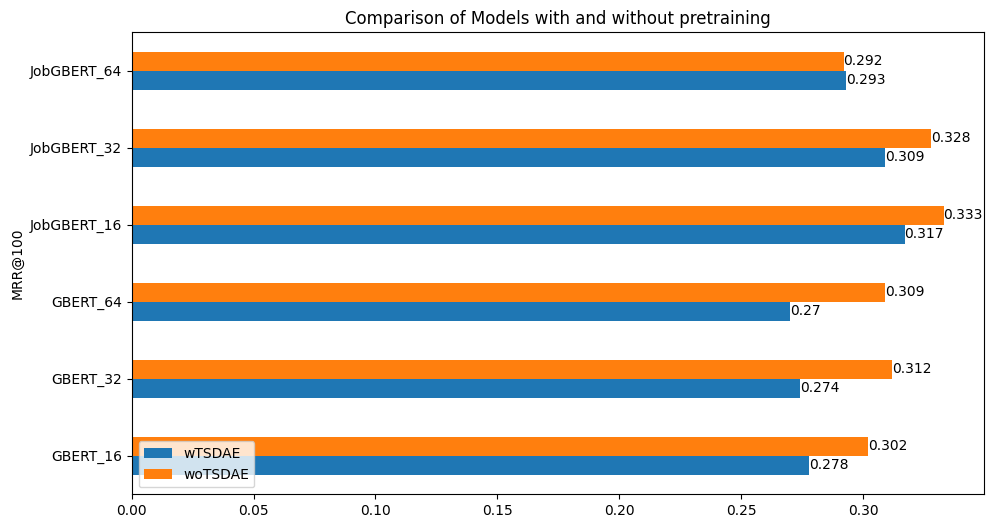

In [44]:
pretraing_df = concat_df.groupby("model",as_index=True, sort="MRR").max().reset_index()[["batchsize","base model","MRR","pretraining"]].reset_index(drop=True)
pretraing_df["modelname"] = pretraing_df.apply(concat,axis=1)
fig = pretraing_df.pivot("pretraining","modelname",values="MRR").T.round(3).plot(kind="barh",ylabel="MRR@100",
                                                                                 title="Comparison of Models with and without pretraining",
                                                                                   figsize=(11,6),
                                                                                 )

fig.legend(loc="lower left")
for container in fig.containers:
    fig.bar_label(container)

C:\Users\lw\AppData\Local\Temp\ipykernel_10044\4190782710.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  plot = model_comparison.pivot("modelname", "base model",values="MRR").sort_values("JobGBERT",ascending=True).round(3).plot(kind="barh",


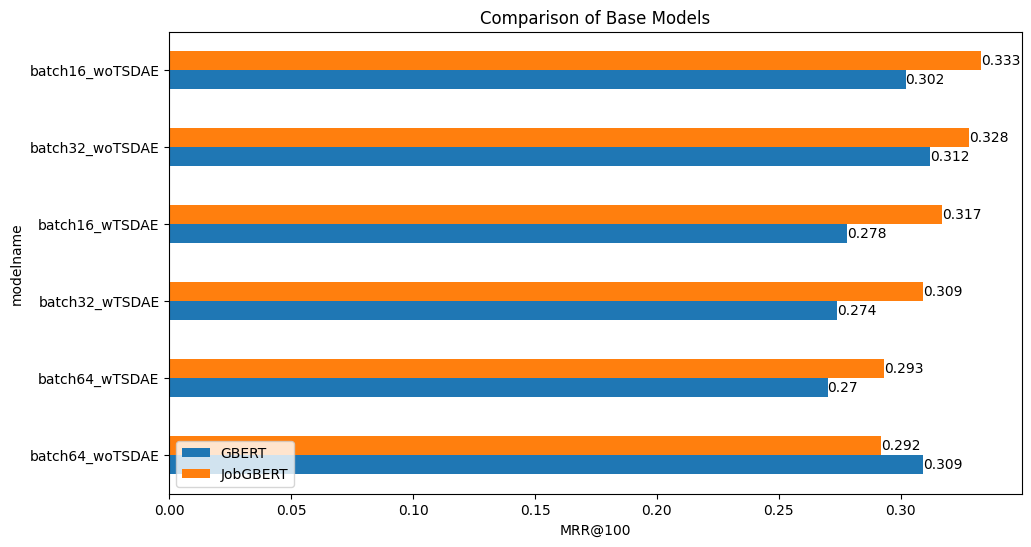

In [45]:
model_comparison = concat_df.groupby("model",as_index=True, sort="MRR").max().reset_index()[["modelname","base model","MRR"]].reset_index(drop=True)
model_comparison["modelname"] = model_comparison["modelname"].apply(lambda x: "_".join(x.split("_")[1:]))
plot = model_comparison.pivot("modelname", "base model",values="MRR").sort_values("JobGBERT",ascending=True).round(3).plot(kind="barh",
                                                                                                                          xlabel="MRR@100",
                                                                                                                          figsize=(11,6),
                                                                                                                          title="Comparison of Base Models")
plot.legend(loc="lower left")
for container in plot.containers:
    plot.bar_label(container)

In [46]:
for item in results:
    results[item].set_index("epoch", inplace=True)

In [47]:
for k in results:
    print(k, results[k]["MRR"].idxmax(axis=0))
    #display(results[k])

jobgbert_batch16_woTSDAE_2e-05_f10 7
jobgbert_batch16_wTSDAE_2e-05_f10 7
jobgbert_batch32_woTSDAE_2e-05_f10 9
jobgbert_batch32_wTSDAE_2e-05_f10 9
jobgbert_batch64_woTSDAE_2e-05_f10 9
jobgbert_batch64_wTSDAE_2e-05_f10 9
gbert_batch16_woTSDAE_2e-05_f10 8
gbert_batch16_wTSDAE_2e-05_f10 4
gbert_batch32_woTSDAE_2e-05_f10 9
gbert_batch32_wTSDAE_2e-05_f10 8
gbert_batch64_woTSDAE_2e-05_f10 9
gbert_batch64_wTSDAE_2e-05_f10 8


# Comparison Total

In [48]:
excel_name = "../00_data/SBERT_Models/Evaluation/final_evaluation.xlsx"

In [49]:
df_total = pd.read_excel(excel_name)
df_total["pretraining"] = df_total["pretraining"].astype(int) 
df_total = df_total[df_total["embedding_kind"].isin(["description","skillsets"])]

In [50]:
replace_dict = {"jobgbert_batch32_woTSDAE":"jobgbert_trained",
                "gbert_batch32_woTSDAE":"gbert_trained",
                "jobgbert_TSDAE_epochs5":"jobgbert_pretrained",
                "gbert_TSDAE_epochs5":"gbert_pretrained",
                "jobgbert_untrained":"jobgbert_untrained",
                "gbert_untrained":"gbert_untrained"}
df_total["model"].replace(replace_dict,inplace=True)

C:\Users\lw\AppData\Local\Temp\ipykernel_10044\3124577073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_overview["MRR"] = df_for_overview["MRR"].round(3)
C:\Users\lw\AppData\Local\Temp\ipykernel_10044\3124577073.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_for_overview = df_for_overview.groupby(["model"]).max().sort_values(by="MRR",ascending=False).reset_index().pivot("base model","training",values="MRR")[["untrained","pretraining","trained"]]


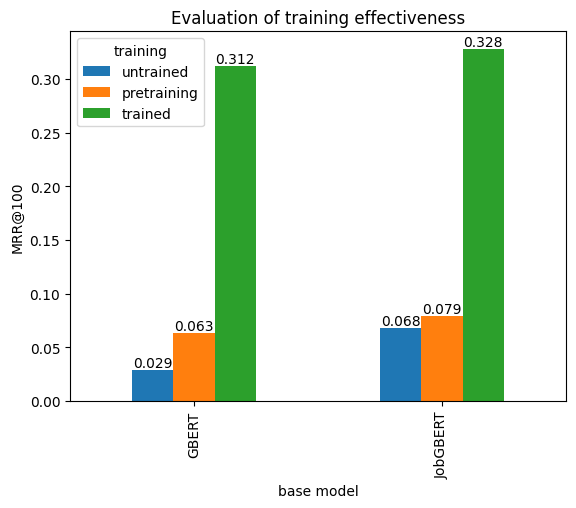

In [51]:
df_for_overview = df_total[df_total["model"].isin(replace_dict.values())]
df_for_overview["MRR"] = df_for_overview["MRR"].round(3)
df_for_overview = df_for_overview.groupby(["model"]).max().sort_values(by="MRR",ascending=False).reset_index().pivot("base model","training",values="MRR")[["untrained","pretraining","trained"]]
ax = df_for_overview.plot(kind="bar",ylabel="MRR@100", title="Evaluation of training effectiveness")
for container in ax.containers:
    ax.bar_label(container)

In [52]:
# fig = px.bar(df_for_overview, y="model",x="MRR",color="basemodel", orientation="h")
# fig.update_layout(yaxis={'categoryorder':'total descending'})
# fig

# Comparison Shortened

In [53]:
df_total = pd.read_excel(excel_name)
df_total = df_total[df_total["embedding_kind"].isin(["description","skillsets"])]
df_total["pretraining"] = df_total["pretraining"].astype(int) 

In [54]:
df_total.head(2)

,model,textkind,embedding_kind,MRR,missing,base model,batchsize,pretraining,training
48,gbert_untrained,embeddings_long,description,0.017777,0.830222,GBERT,NaN,0,untrained
49,gbert_TSDAE_epochs5,embeddings_long,description,0.019260,0.817333,GBERT,NaN,1,pretraining


In [55]:
df_shortened = df_total[df_total["training"]=="trained"].groupby(["model", "textkind"]).max().reset_index()
df_shortened = df_shortened.pivot("model","textkind",values="MRR").reset_index()
df_shortened[df_shortened["model"].str.contains("job")]
df_shortened = df_shortened.rename({"embeddings_long":"original text","embeddings_short":"shortened text"},axis=1)


C:\Users\lw\AppData\Local\Temp\ipykernel_10044\3873132958.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_shortened = df_shortened.pivot("model","textkind",values="MRR").reset_index()


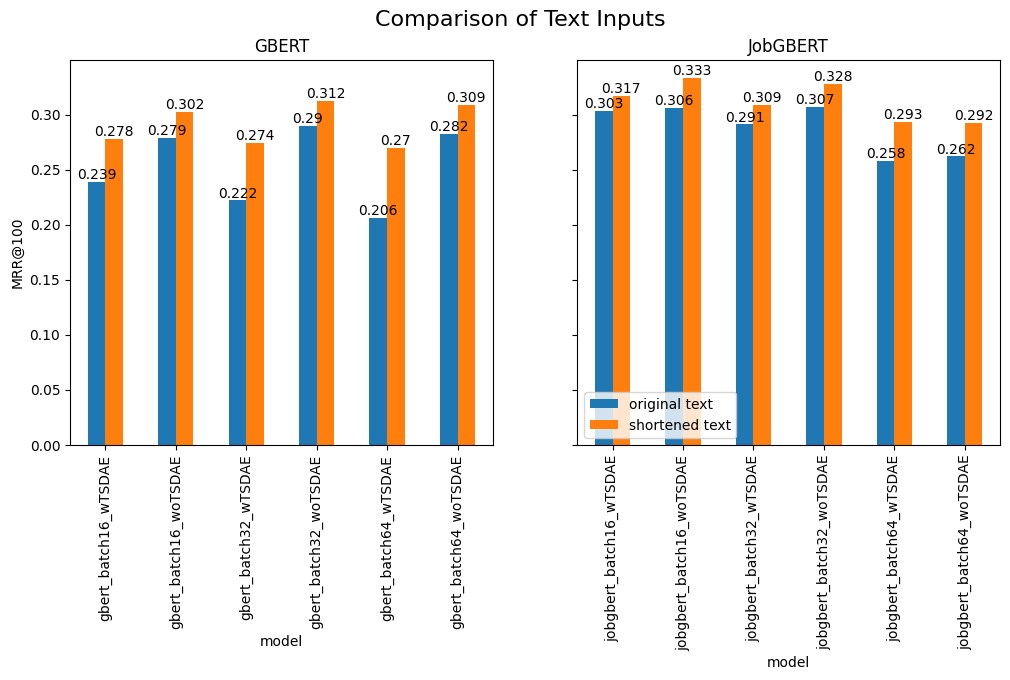

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 5))
fig.suptitle('Comparison of Text Inputs', fontsize=16)

fig1 = df_shortened[df_shortened["model"].str.contains("job")].round(3).plot(x="model",ylabel="MRR@100", title="JobGBERT", kind="bar", ax=axes[1])
fig1.legend(loc="lower left")
for container in fig1.containers:
    fig1.bar_label(container)
fig2 = df_shortened[~df_shortened["model"].str.contains("job")].round(3).plot(x="model",ylabel="MRR@100", title="GBERT", kind="bar", ax=axes[0],legend=False)
for container in fig2.containers:
    fig2.bar_label(container)

# Comparison embeddings


In [57]:
df_total = pd.read_excel(excel_name)
df_total = df_total[df_total["embedding_kind"]!="job_centroid"]
df_total["pretraining"] = df_total["pretraining"].astype(int)
df_total["MRR"] = df_total["MRR"].round(3)
df_total["embedding_kind"] = df_total["embedding_kind"].str.replace("adcentroid_filtered","filtered JAC")
df_total["embedding_kind"] = df_total["embedding_kind"].str.replace("adcentroid_unfiltered","unfiltered JAC")

C:\Users\lw\AppData\Local\Temp\ipykernel_10044\508205795.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df_embeddings = df_total.groupby(["embedding_kind"]).max().sort_values(by="MRR")


,model,textkind,MRR,missing,base model,pretraining,training
embedding_kind,,,,,,,
skillsets,jobgbert_untrained,embeddings_short,0.265,0.824000,JobGBERT,1,untrained
jobtitle,jobgbert_batch64_woTSDAE,embeddings_short,0.321,0.293333,JobGBERT,1,trained
description,jobgbert_untrained,embeddings_short,0.333,0.830222,JobGBERT,1,untrained
filtered JAC,jobgbert_batch64_woTSDAE,embeddings_short,0.484,0.110222,JobGBERT,1,trained
unfiltered JAC,jobgbert_batch64_woTSDAE,embeddings_short,0.485,0.110222,JobGBERT,1,trained


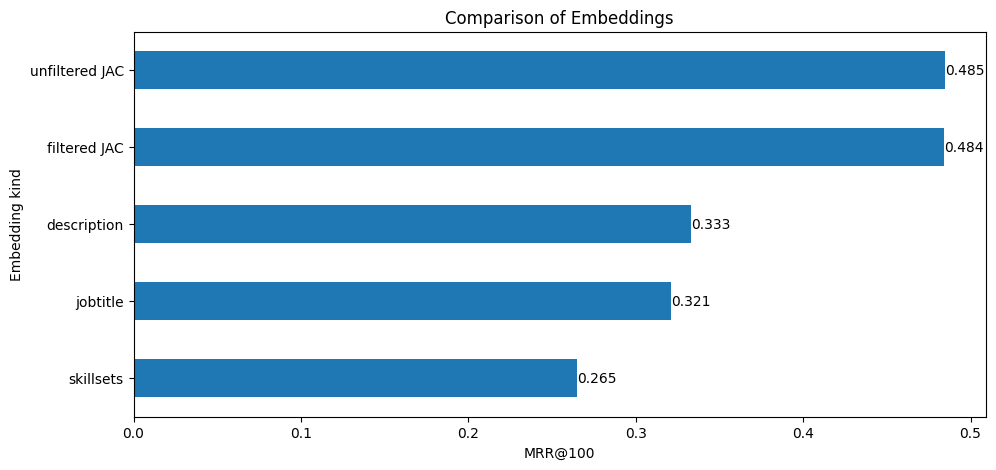

In [58]:
df_embeddings = df_total.groupby(["embedding_kind"]).max().sort_values(by="MRR")
display(df_embeddings)
df_embeddings["MRR"] = df_embeddings["MRR"].round(3)
ax = df_embeddings["MRR"].plot(kind="barh",y="MRR",xlabel="MRR@100",ylabel="Embedding kind",figsize=(11,5), title="Comparison of Embeddings")
ax = ax.bar_label(ax.containers[0])

# Job Centroids

In [59]:
df_total = pd.read_excel(excel_name)
df_total = df_total[df_total["embedding_kind"]=="job_centroid"]
df_total["pretraining"] = df_total["pretraining"].astype(int)
df_total["MRR"] = df_total["MRR"].round(3)

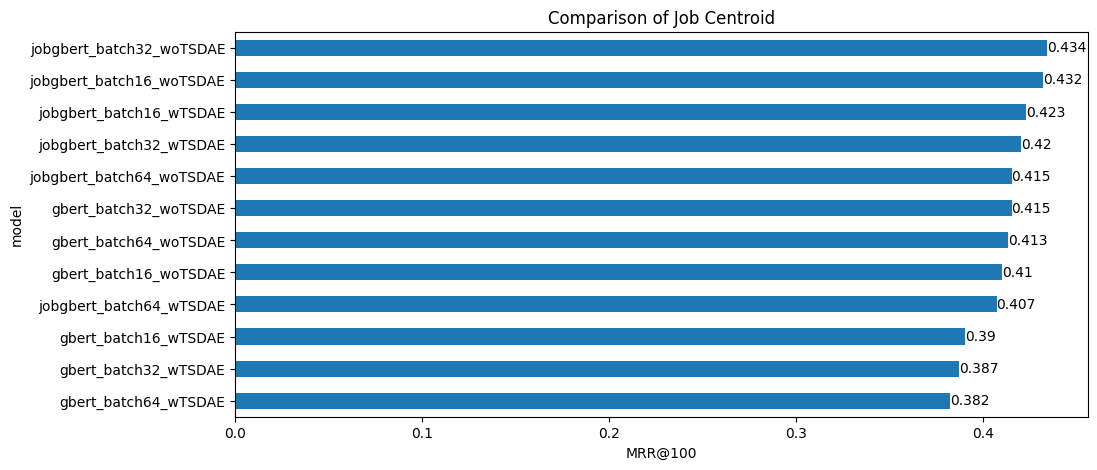

In [60]:
df_embeddings = df_total.groupby(["model"]).max().sort_values(by="MRR")
df_embeddings
df_embeddings["MRR"] = df_embeddings["MRR"].round(3)
ax = df_embeddings["MRR"].plot(kind="barh",y="MRR",xlabel="MRR@100",
                               ylabel="model",figsize=(11,5), title="Comparison of Job Centroid")
ax = ax.bar_label(ax.containers[0])